In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
baseline = pd.read_csv("results/baseline.csv")
baseline

,language,train_f1,val_f1,test_f1
0,mg,0.993728,0.933673,0.960352
1,fo,0.974224,0.897482,0.901099
2,co,0.956204,0.852308,0.813230
3,hsb,0.951443,0.923387,0.854578
4,bh,0.981549,0.888689,0.802120
5,cv,0.977741,0.892617,0.830443


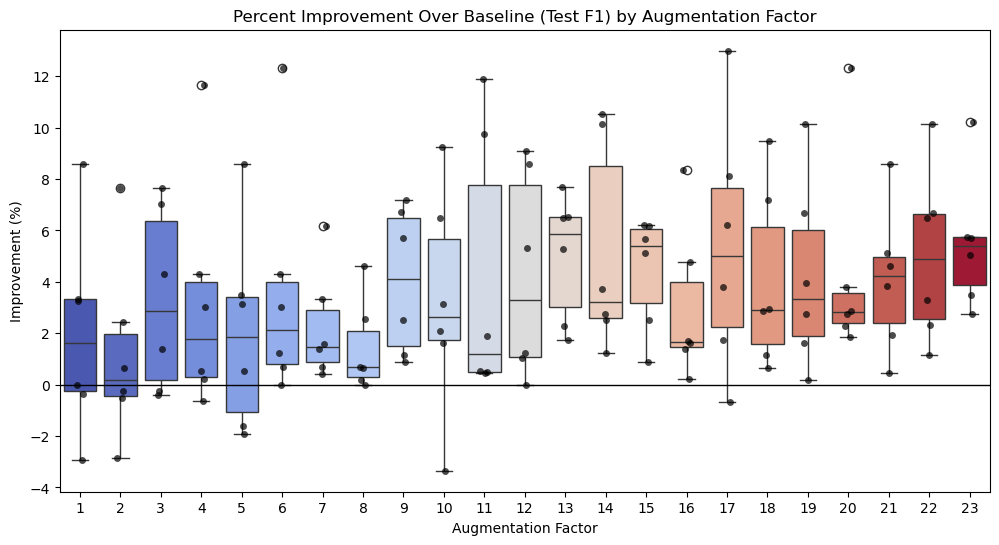

In [11]:
# Load transfer (augmented) data
df = pd.read_csv("results/transfer_learning.csv")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    legend=False,
    hue="augmentation_factor",
    palette="coolwarm",
)
sns.stripplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    color="black",
    jitter=True,
    alpha=0.7,
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title("Percent Improvement Over Baseline (Test F1) by Augmentation Factor")
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")

plt.savefig("graphs/transfer_improvement.svg", format="svg", bbox_inches="tight")

plt.show()

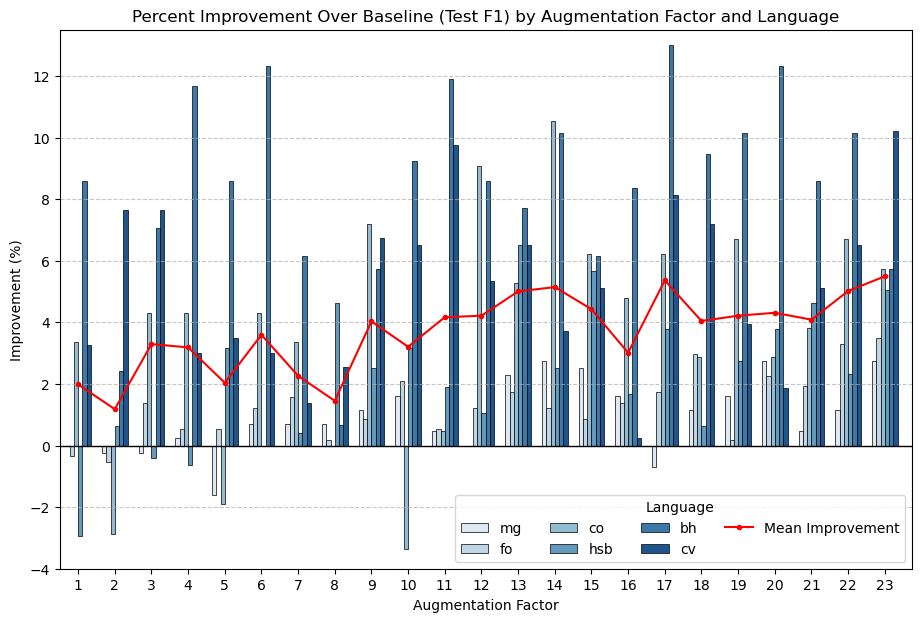

In [12]:
# Visualization using Seaborn
plt.figure(figsize=(11, 7))
ax = sns.barplot(
    data=df,
    x="augmentation_factor",
    y="improvement",
    hue="low_resource_lang",
    palette="Blues",
    dodge=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
)

language_avgs = df.groupby("augmentation_factor")["improvement"].mean()

plt.plot(
    range(len(language_avgs.index)),
    language_avgs,
    color="red",
    marker=".",
    label="Mean Improvement",
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Augmentation Factor and Language"
)
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", loc="lower right", ncol=4)

# Improve readability
plt.xticks(rotation=0)
plt.ylim(-4, 13.5)
plt.xlim(-0.5, max(df["augmentation_factor"]) - 0.25)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig(
    "graphs/detailed_transfer_improvement.svg", format="svg", bbox_inches="tight"
)

plt.show()

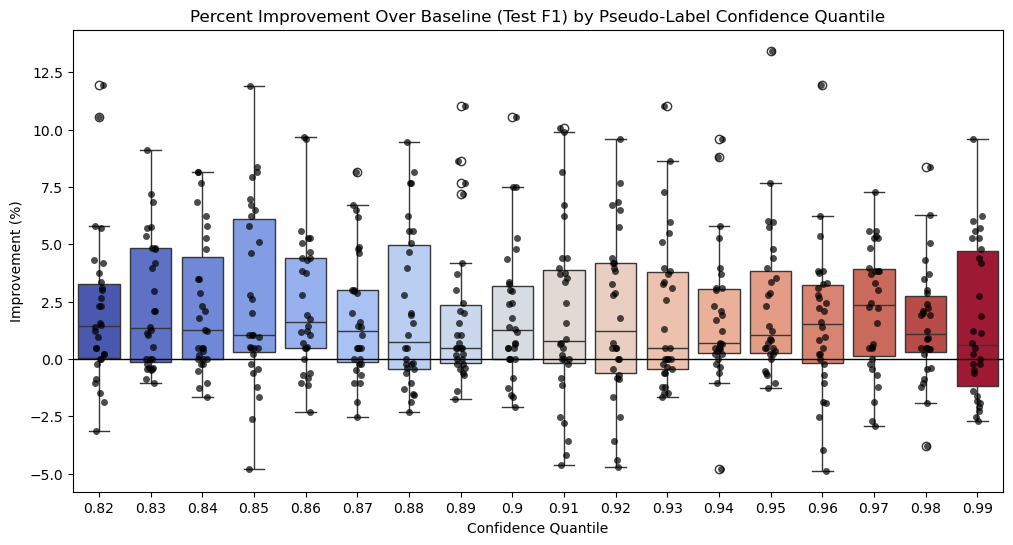

In [13]:
df = pd.read_csv("results/big_full_iterative_pseudo_labeling.csv")


# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="confidence_quantile",
    y="improvement",
    legend=False,
    hue="confidence_quantile",
    palette="coolwarm",
)
sns.stripplot(
    data=df,
    x="confidence_quantile",
    y="improvement",
    color="black",
    jitter=True,
    alpha=0.7,
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Pseudo-Label Confidence Quantile"
)
plt.xlabel("Confidence Quantile")
plt.ylabel("Improvement (%)")

plt.savefig("graphs/all_pseudo_improvement.svg", format="svg", bbox_inches="tight")

plt.show()

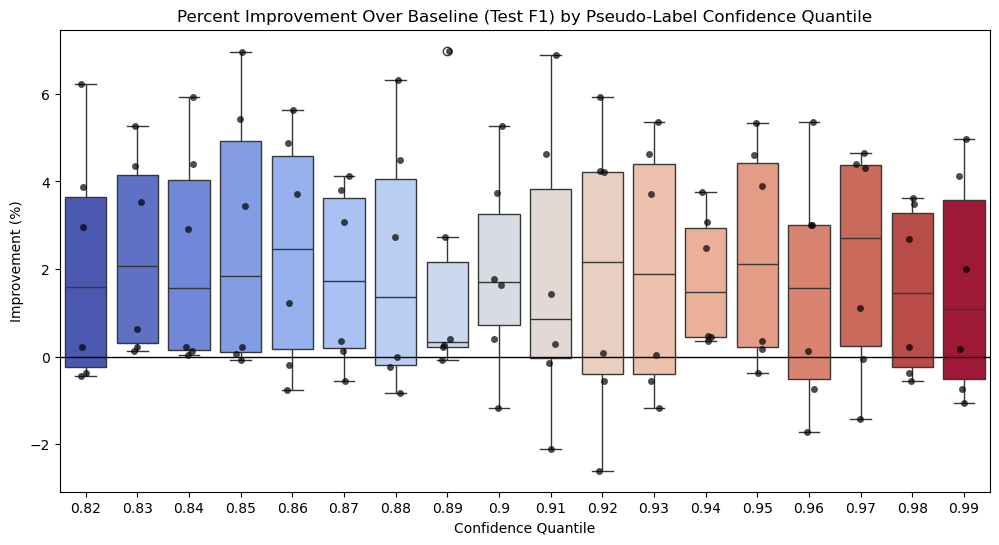

In [14]:
df = pd.read_csv("results/big_full_iterative_pseudo_labeling.csv")

per_lang_performance = (
    df.groupby(["language", "confidence_quantile"])["improvement"].mean().reset_index()
)
# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=per_lang_performance,
    x="confidence_quantile",
    y="improvement",
    legend=False,
    hue="confidence_quantile",
    palette="coolwarm",
)
sns.stripplot(
    data=per_lang_performance,
    x="confidence_quantile",
    y="improvement",
    color="black",
    jitter=True,
    alpha=0.7,
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Pseudo-Label Confidence Quantile"
)
plt.xlabel("Confidence Quantile")
plt.ylabel("Improvement (%)")

plt.savefig("graphs/pseudo_improvement.svg", format="svg", bbox_inches="tight")

plt.show()

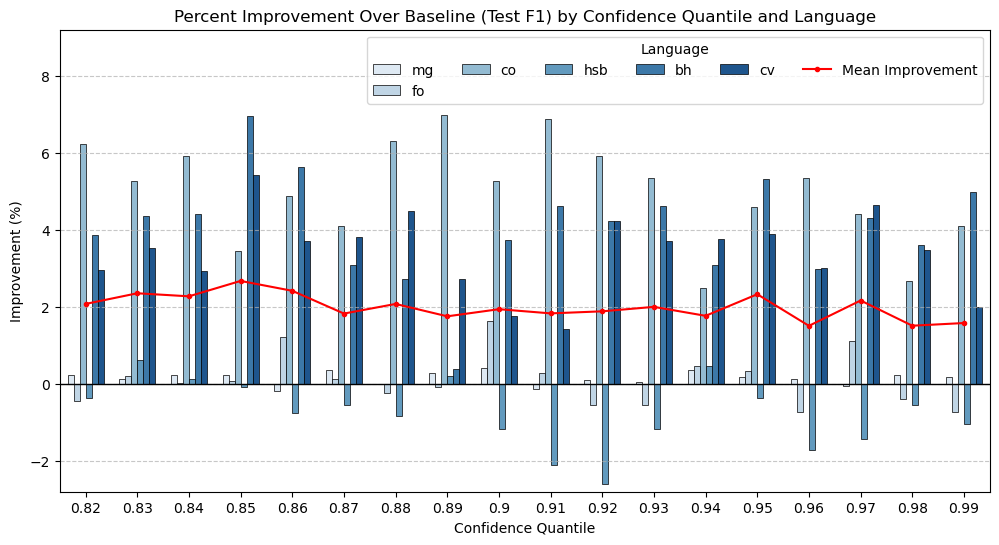

In [15]:
df = pd.read_csv("results/big_full_iterative_pseudo_labeling.csv")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df,
    x="confidence_quantile",
    y="improvement",
    hue="language",
    palette="Blues",
    dodge=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
    errorbar=None,
)

language_avgs = df.groupby("confidence_quantile")["improvement"].mean()
plt.plot(
    range(len(language_avgs.index)),
    language_avgs,
    color="red",
    marker=".",
    label="Mean Improvement",
)

plt.axhline(y=0, color="black", linewidth=1)
plt.title(
    "Percent Improvement Over Baseline (Test F1) by Confidence Quantile and Language"
)

plt.xlabel("Confidence Quantile")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", loc="upper right", ncol=6)

# Improve readability
plt.xticks(rotation=0)
plt.ylim(-2.8, 9.2)
plt.xlim(-0.5, 17.5)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("graphs/detailed_pseudo_improvement.svg", format="svg", bbox_inches="tight")

plt.show()